<h1 style='text-align: center;'> Pretrained Emotion Detector </h1>

In [4]:
from IPython import display

In [5]:
!pip install fer
display.clear_output()

2023-07-31 19:33:24.684320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:fer:29.97 fps, 519 frames, 17.32 seconds
INFO:fer:Making directories at output
100%|█████████████████████████████████████| 519/519 [02:46<00:00,  3.12frames/s]
INFO:fer:Completed analysis: saved to output/myVideo_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 9%
INFO:fer:Compressing: 19%
INFO:fer:Compressing: 28%
INFO:fer:Compressing: 38%
INFO:fer:Compressing: 48%
INFO:fer:Compressing: 57%
INFO:fer:Compressing: 67%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 86%
INFO:fer:Compressing: 96%
INFO:fer:Zip has finished


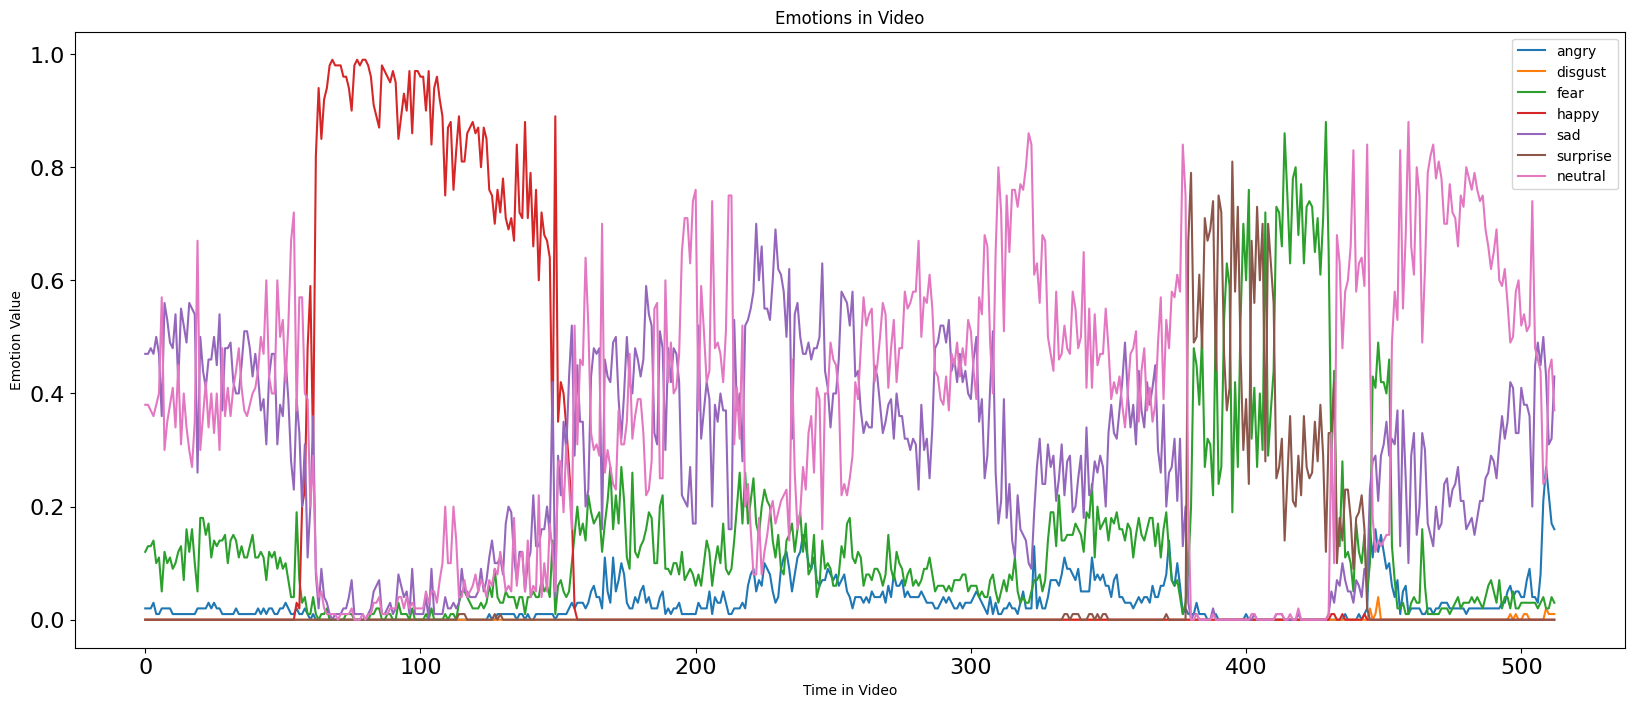

          Emotion Value from the Video
Angry                            15.71
Disgust                           0.16
Fear                             70.54
Happy                            79.31
Sad                             137.88
Surprise                         26.69
Neutral                         181.78


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from fer import Video
from fer import FER

# Put in the location of the video file that has to be processed
location_videofile = "myVideo.mp4"

def analyze_video_emotions(video_location):
    # Build the Face detection detector
    face_detector = FER(mtcnn=True)
    
    # Input the video for processing
    input_video = Video(video_location)

    # The analyze() function will run analysis on every frame of the input video.
    # It will create a rectangular box around every image and show the emotion values next to that.
    # Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
    processing_data = input_video.analyze(face_detector, display=False)

    # Convert the analyzed information into a dataframe.
    # This will help us import the data as a .CSV file to perform analysis over it later.
    vid_df = input_video.to_pandas(processing_data)
    vid_df = input_video.get_first_face(vid_df)
    vid_df = input_video.get_emotions(vid_df)
    
    return vid_df

# Analyze the video and get the emotions dataframe
vid_df = analyze_video_emotions(location_videofile)

# Plotting the emotions against time in the video
plt.figure(figsize=(20, 8))
vid_df.plot(ax=plt.gca(), fontsize=16)
plt.xlabel("Time in Video")
plt.ylabel("Emotion Value")
plt.title("Emotions in Video")
plt.show()

# Extract which emotion was prominent in the video
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = vid_df.sum()

score_comparisons = pd.DataFrame(emotions_values, columns=['Emotion Value from the Video'])
score_comparisons.index = emotions
print(score_comparisons)
